In [3]:
library(dplyr)
library(ggplot2)
library(xts)
library(forecast)



Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

Loading required package: zoo

Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


Attaching package: ‘xts’

The following objects are masked from ‘package:dplyr’:

    first, last



# Marriages Prediction

the data is fairly simple. Its the monthly number of transactions from 2010 to 2016. 

1. Merge the data
2. Exploratory Analysis
3. Forecast
4. Evaluate - when new data is released

# 1) Merge Dataset

In [4]:
df2016 <- read.csv('Marriages2016.csv')
df2015 <- read.csv('Marriages2015.csv')
df2014 <- read.csv('Marriages2014.csv')
df2013 <- read.csv('Marriages2013.csv')
df2012 <- read.csv('Marriages2012.csv')
df2011 <- read.csv('Marriages2011.csv')
df2010 <- read.csv('Marriages2010.csv')

In [5]:
df2016 <- cbind(year=2016,df2016)
df2015 <- cbind(year=2015,df2015)
df2014 <- cbind(year=2014,df2014)
df2013 <- cbind(year=2013,df2013)
df2012 <- cbind(year=2012,df2012)
df2012<- df2012[1:12,]
df2011 <- cbind(year=2011,df2011)
df2010 <- cbind(year=2010,df2010)

In [6]:
df2012

year,Month,Transactions
2012,1,1232
2012,2,1334
2012,3,2370
2012,4,2292
2012,5,2169
2012,6,1937
2012,7,1441
2012,8,2041
2012,9,3762
2012,10,3016


In [7]:
df <- do.call("rbind", list(df2010,df2011,df2012, df2013, df2014,df2015,df2016))

In [8]:
mts <- ts(df$Transactions, start = c(2010, 1), frequency=12)

In [9]:
m_xts <- as.xts(mts)

# 2) Exploring and Analysing the data

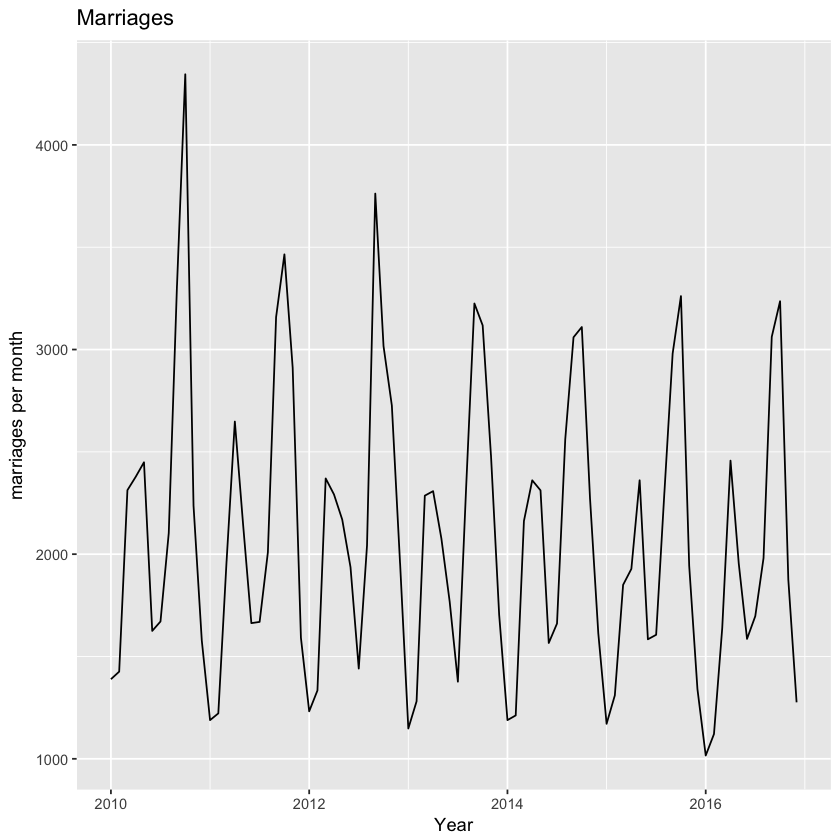

In [32]:
autoplot(mts) +
  ggtitle("Marriages") +
  ylab("marriages per month") + xlab("Year")

In [11]:
fit <- stl(mts, s.window="periodic")

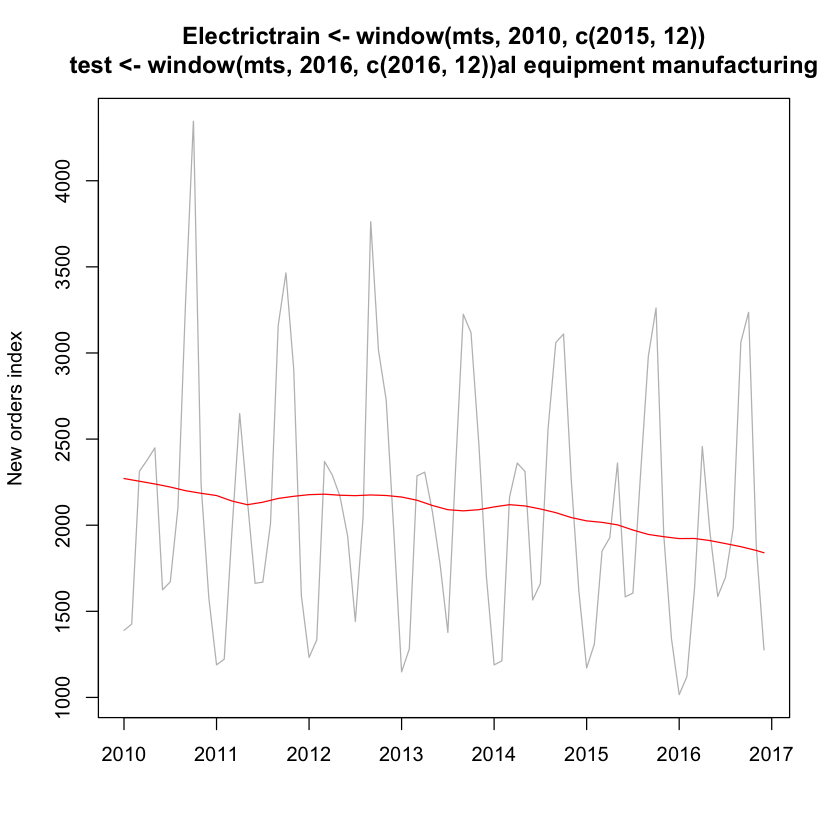

In [12]:
plot(mts, col="gray",
 main="Electrictrain <- window(mts, 2010, c(2015, 12))
test <- window(mts, 2016, c(2016, 12))al equipment manufacturing",
 ylab="New orders index", xlab="")
lines(fit$time.series[,2],col="red",ylab="Trend")

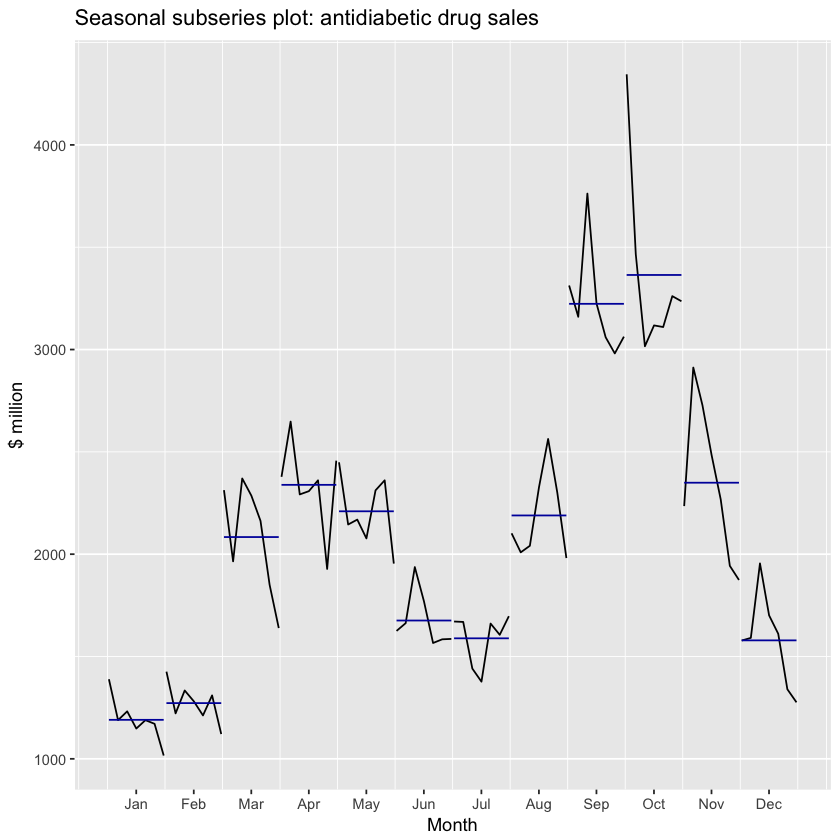

In [13]:
ggsubseriesplot(mts) + ylab("$ million") +
  ggtitle("Seasonal subseries plot: antidiabetic drug sales")

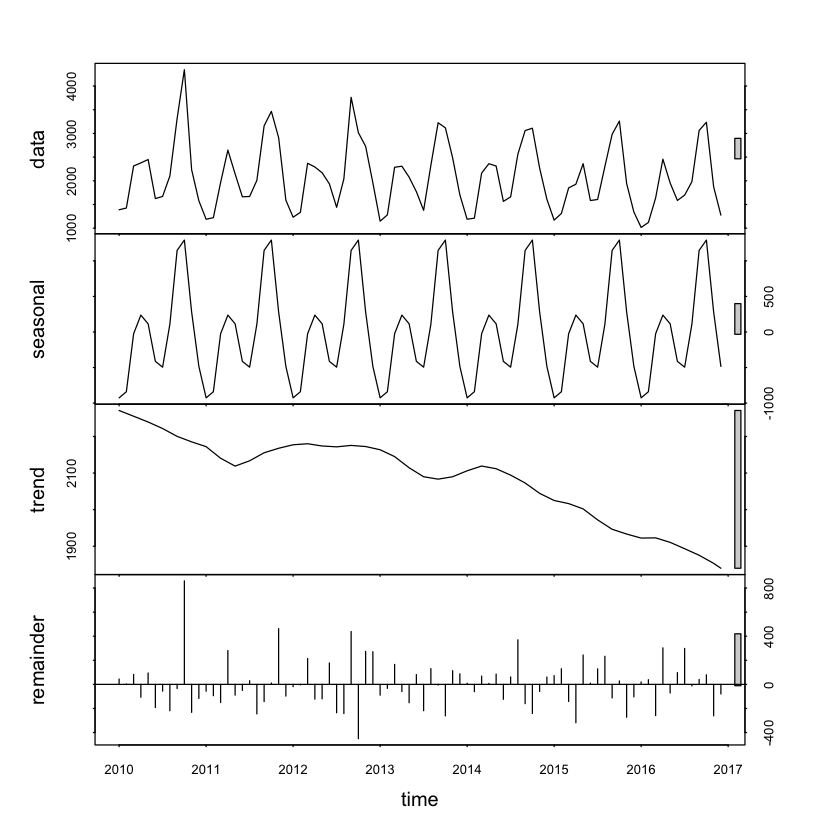

In [14]:
plot(fit)

# 3) Forecasting

In [35]:
train <- window(mts, 2010, c(2015, 12))
test <- window(mts, 2016, c(2016, 12))

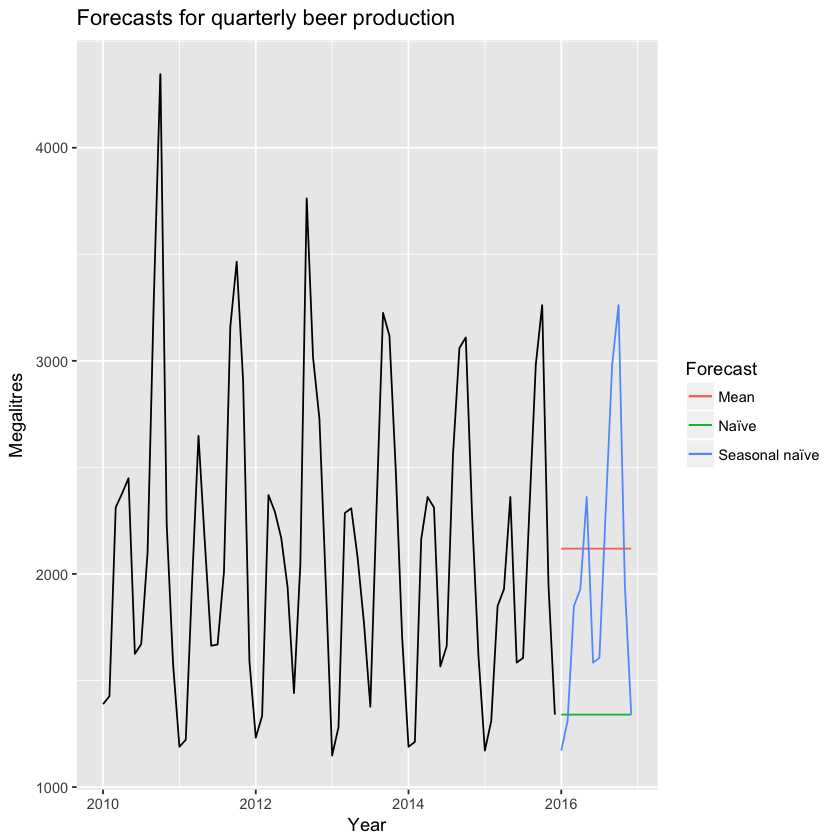

In [37]:
autoplot(train) +
  forecast::autolayer(meanf(train, h=12)$mean, series="Mean") +
  forecast::autolayer(naive(train, h=12)$mean, series="Naïve") +
  forecast::autolayer(snaive(train, h=12)$mean, series="Seasonal naïve") +
  ggtitle("Forecasts for quarterly beer production") +
  xlab("Year") + ylab("Megalitres") +
  guides(colour=guide_legend(title="Forecast"))

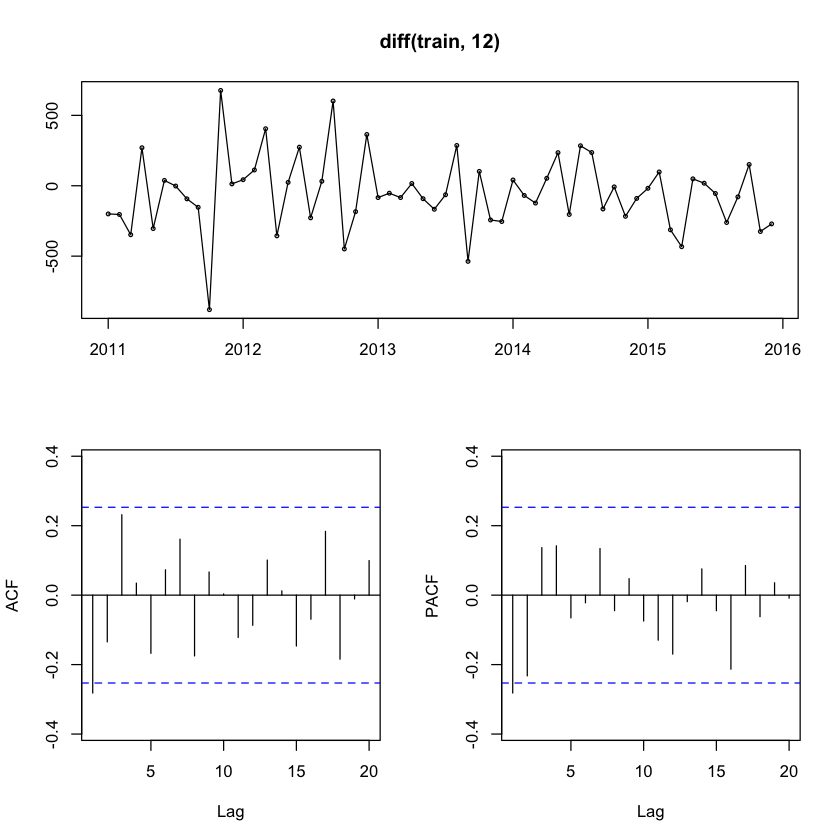

In [18]:
tsdisplay(diff(train,12))

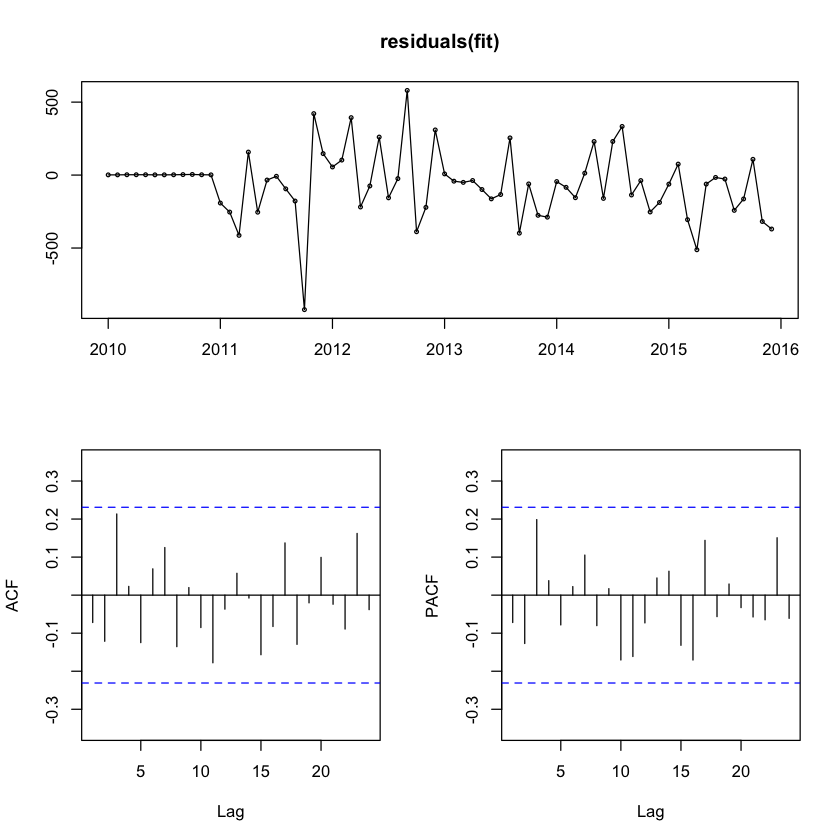

In [19]:
fit <- Arima(train, order=c(1,0,1), seasonal=c(1,1,0))
tsdisplay(residuals(fit))

In [20]:
res <- residuals(fit)

In [21]:
Box.test(res, lag=16, fitdf=4, type="Ljung")


	Box-Ljung test

data:  res
X-squared = 16.286, df = 12, p-value = 0.1785


In [22]:
fcast2 <- forecast(fit, h=12)

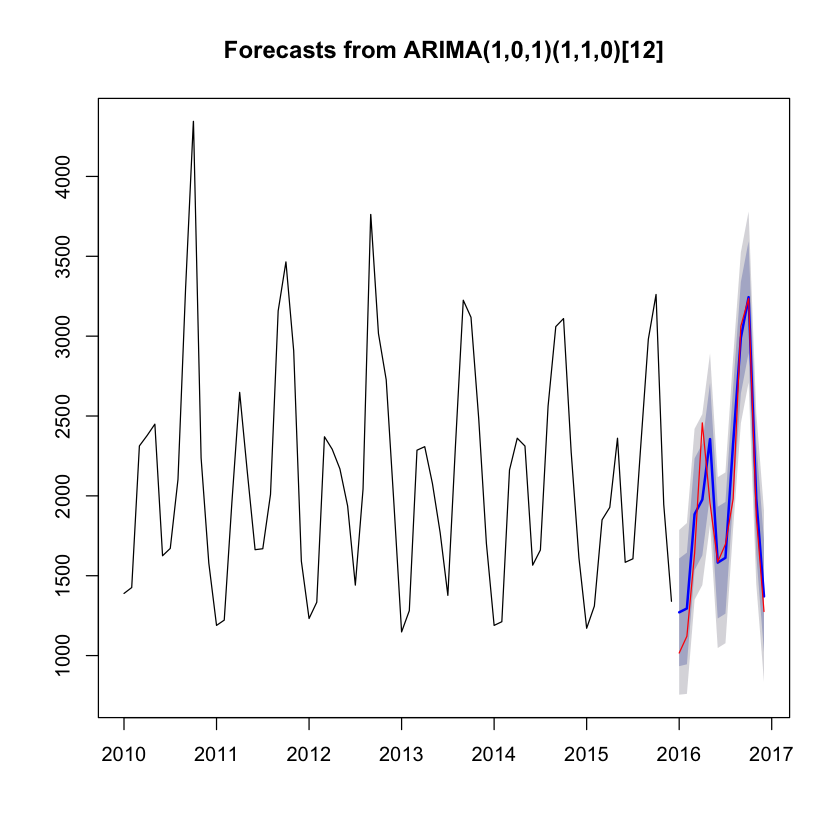

In [23]:
plot(forecast(fit, h=12))
lines(test,col="red",ylab="Trend")

In [24]:
sqrt(round(sum((fcast2$mean - test)**2),2))
sqrt(round(sum((fcast$mean - test)**2),2))

[1] 838.6002

[1] 811.3464

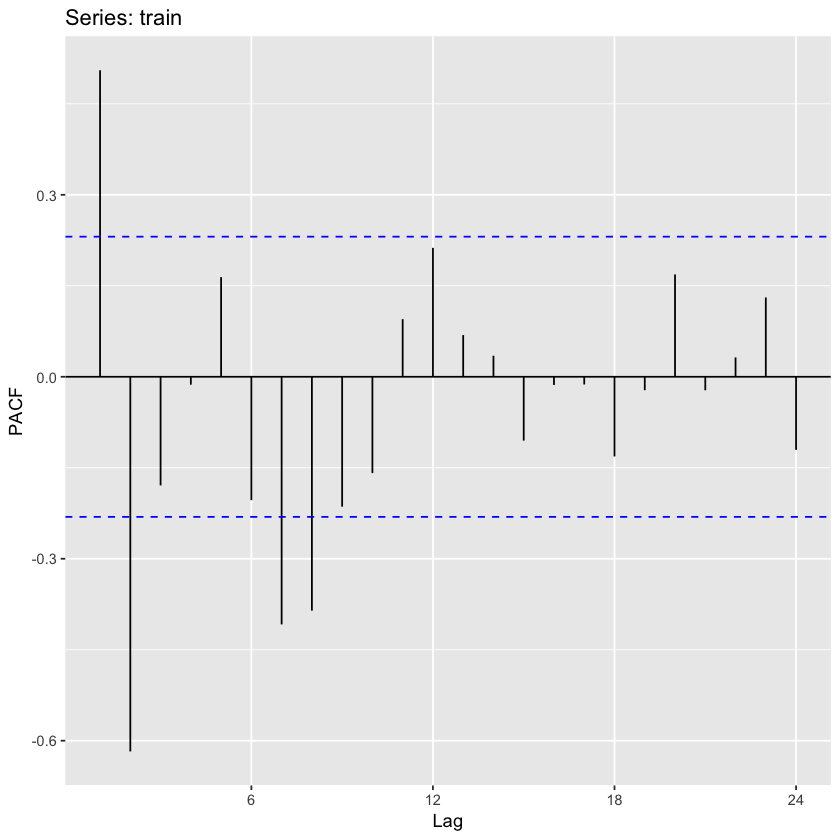

In [28]:
ggPacf(train)

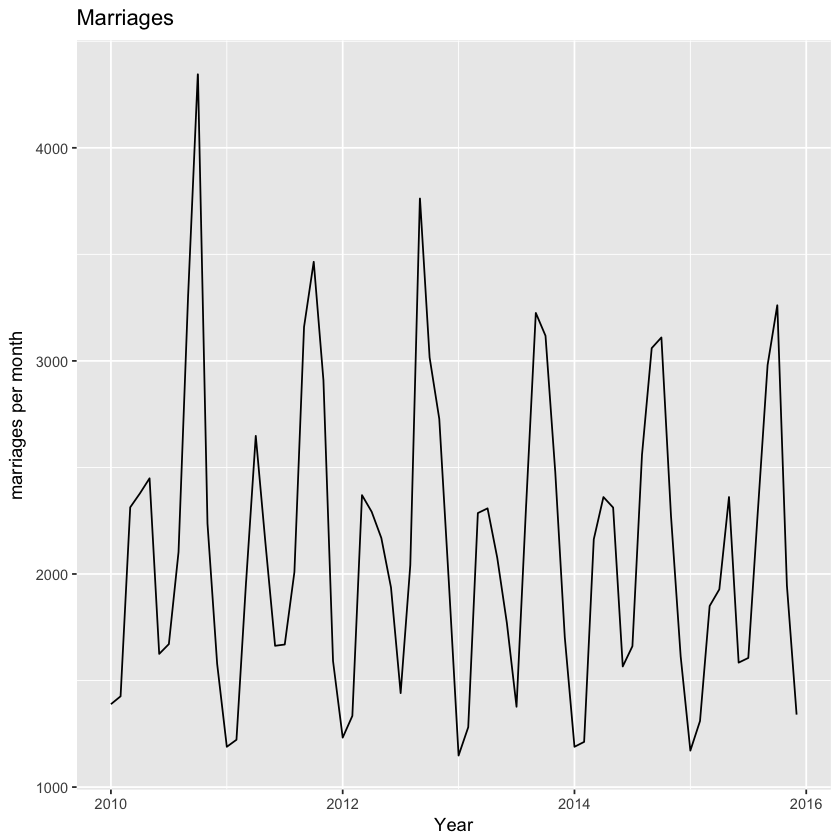

In [38]:
(lambda <- BoxCox.lambda(train))

[1] -0.9999242

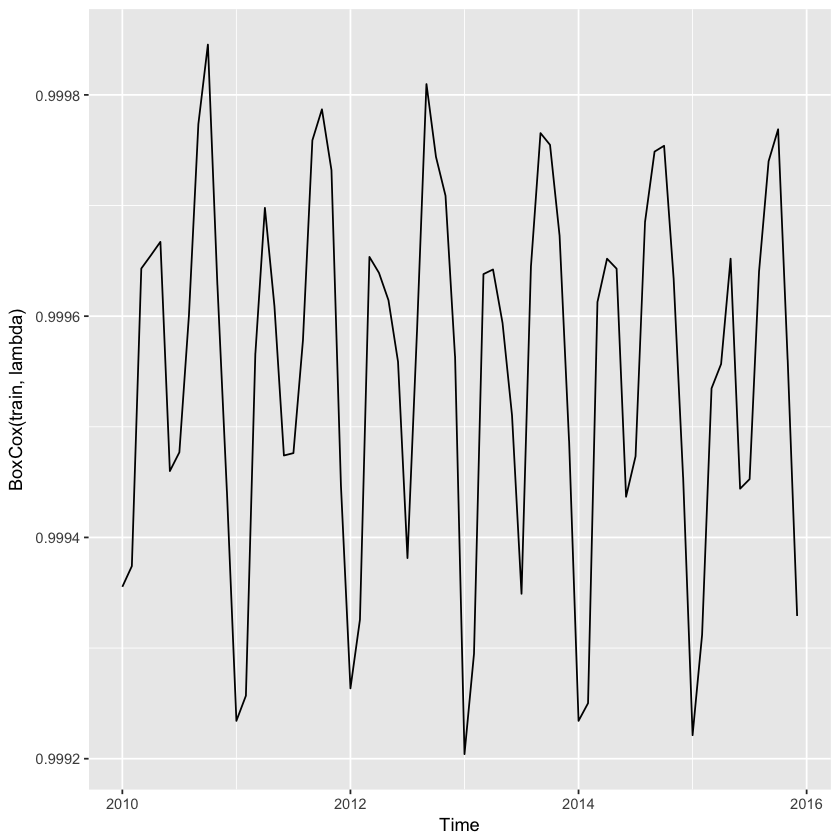

In [39]:
autoplot(BoxCox(train,lambda))


	Ljung-Box test

data:  Residuals from Naive method
Q* = 340.99, df = 24, p-value < 2.2e-16

Model df: 0.   Total lags used: 24



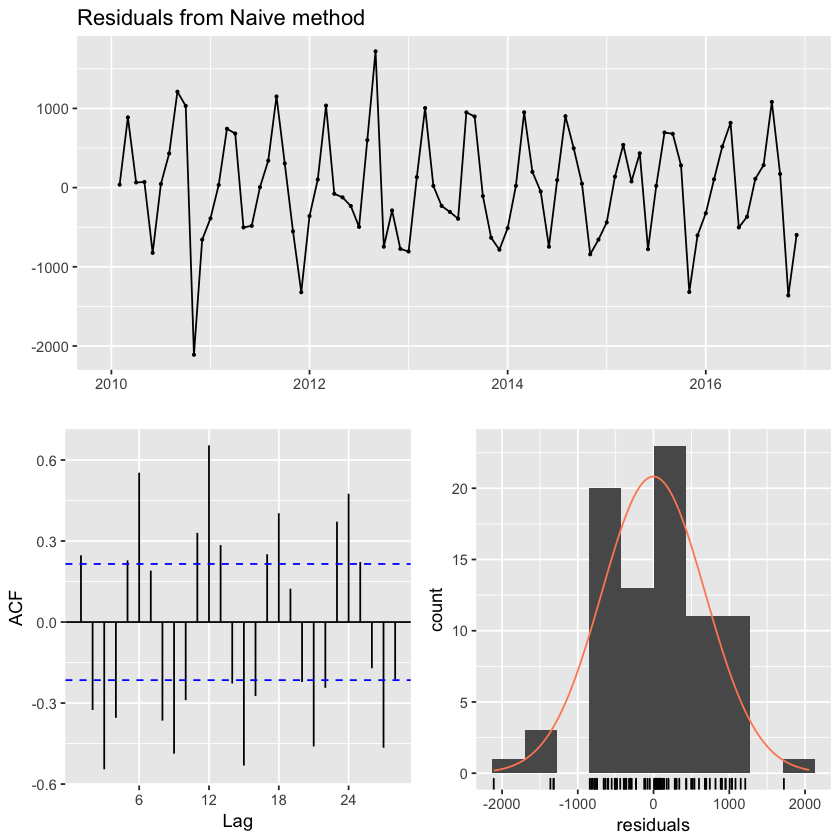

In [40]:
checkresiduals(naive(mts))

In [43]:
Box.test(train,lag=2, fitdf=0, type="Lj")


	Box-Ljung test

data:  train
X-squared = 22.349, df = 2, p-value = 1.402e-05


In [47]:
accuracy(fcast2, test)

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,-61.21600,234.0613,164.1997,-3.277015,7.789798,0.8187472,-0.07195983,NA
Test set,-82.70253,242.0830,189.7703,-6.661927,11.194116,0.9462495,-0.53197506,0.4546789


In [48]:
e <- tsCV(mts, rwf, drift=TRUE, h=1)

In [49]:
sqrt(mean(e^2, na.rm=TRUE))

[1] 705.8944